In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv("C:/Users/Zephyrus/Datasets/Titanic/train.csv")

In [3]:
df2= pd.read_csv("C:/Users/Zephyrus/Datasets/Titanic/test.csv")

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
y=df['Survived']
df=df.drop(['Survived'], axis=1)
df=df.append(df2)
df.reset_index(inplace=True)
df.drop(['index', 'PassengerId'], inplace=True, axis=1)

In [6]:
df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
titles=set()
for name in df['Name']:
    titles.add(name.split(',')[1].split('.')[0].strip())

In [8]:
print(titles)

{'Ms', 'Mr', 'Dr', 'Sir', 'Capt', 'Jonkheer', 'Mlle', 'the Countess', 'Rev', 'Don', 'Mrs', 'Lady', 'Master', 'Dona', 'Mme', 'Major', 'Miss', 'Col'}


In [9]:
Title_Dictionary = {
    "Capt": "Officer",
    "Col": "Officer",
    "Major": "Officer",
    "Jonkheer": "Royalty",
    "Don": "Royalty",
    "Sir" : "Royalty",
    "Dr": "Officer",
    "Rev": "Officer",
    "the Countess":"Royalty",
    "Mme": "Mrs",
    "Mlle": "Miss",
    "Ms": "Mrs",
    "Mr" : "Mr",
    "Mrs" : "Mrs",
    "Miss" : "Miss",
    "Master" : "Master",
    "Lady" : "Royalty"
}

In [10]:
def status(feature):
    print('Processing', feature, ': ok')

In [11]:
df['Title'] = df['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
df['Title'] = df.Title.map(Title_Dictionary)
status('Title')

Processing Title : ok


In [12]:
df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [13]:
df['Age'] = df['Age'].fillna(df['Age'].median())

In [14]:
grouped_train =df.iloc[:891].groupby(['Sex', 'Pclass', 'Title'])
grouped_median_train=grouped_train.median()
grouped_median_train=grouped_median_train.reset_index()[['Sex', 'Pclass', 'Title', 'Age']]
grouped_median_train.head()

,Sex,Pclass,Title,Age
0,female,1,Miss,29.5
1,female,1,Mrs,38.0
2,female,1,Officer,49.0
3,female,1,Royalty,40.5
4,female,2,Miss,24.0


In [15]:
def fill_age(row):
    condition = (
        (grouped_median_train['Sex'] == row['Sex']) & 
        (grouped_median_train['Title'] == row['Title']) & 
        (grouped_median_train['Pclass'] == row['Pclass'])
    ) 
    return grouped_median_train[condition]['Age'].values[0]
def process_age():
        global combined
        df['Age']=df.apply(lambda row: fill_age(row) if np.isnan(row['Age']) else row['Age'], axis=1)
        status('age')
        return df
        
        df=process_age()

In [16]:
df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [17]:
data=df.drop('Name', axis=1)

In [18]:
enc_titles=pd.get_dummies(data['Title'], prefix='Title')
data=pd.concat([data,enc_titles], axis=1)
data=data.drop('Title', axis=1)
status('names')

Processing names : ok


In [19]:
data.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,0,0
1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,0,1,0,0
2,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0,0,0
3,1,female,35.0,1,0,113803,53.1000,C123,S,0,0,0,1,0,0
4,3,male,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,0,0


In [20]:
data['Sex']= data['Sex'].map({'male':1, 'female':0})

In [21]:
data.Fare.fillna(data.iloc[:891].Fare.mean(), inplace=True)

In [22]:
data.Embarked.fillna('S')
enc_embarked=pd.get_dummies(data['Embarked'], prefix= 'Embarked')
data=pd.concat([data, enc_embarked], axis=1)
data=data.drop('Embarked', axis=1)

In [23]:
data.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Embarked_C,Embarked_Q,Embarked_S
0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,0,0,0,0,0,1
1,1,0,38.0,1,0,PC 17599,71.2833,C85,0,0,0,1,0,0,1,0,0
2,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,0,0,0,0,0,0,1
3,1,0,35.0,1,0,113803,53.1000,C123,0,0,0,1,0,0,0,0,1
4,3,1,35.0,0,0,373450,8.0500,NaN,0,0,1,0,0,0,0,0,1


In [24]:
train_cabin, test_cabin = set(), set()

for c in data.iloc[:891]['Cabin']:
    try:
        train_cabin.add(c[0])
    except:
        train_cabin.add('U')
        
for c in data.iloc[891:]['Cabin']:
    try:
        test_cabin.add(c[0])
    except:
        test_cabin.add('U')

In [25]:
data.Cabin.fillna('U', inplace=True)
data['Cabin']=data['Cabin'].map(lambda c: c[0])
enc_cabin= pd.get_dummies(data['Cabin'], prefix='Cabin')
data=pd.concat([data,enc_cabin], axis=1)

data=data.drop('Cabin', axis=1)
status('cabin')

Processing cabin : ok


In [26]:
def cleanTicket(ticket):
    ticket = ticket.replace('.', '')
    ticket = ticket.replace('/', '')
    ticket = ticket.split()
    ticket = map(lambda t : t.strip(), ticket)
    ticket = list(filter(lambda t : not t.isdigit(), ticket))
    if len(ticket) > 0:
        return ticket[0]
    else: 
        return 'XXX'

tickets = set()
for t in data['Ticket']:
    tickets.add(cleanTicket(t))

print(len(tickets))

37


In [27]:
def process_ticket():
    
    global data
    
    def cleanTicket(ticket):
        ticket = ticket.replace('.','')
        ticket = ticket.replace('/','')
        ticket = ticket.split()
        ticket = map(lambda t : t.strip(), ticket)
        ticket = filter(lambda t : not t.isdigit(), ticket)
    

    data['Ticket'] = data['Ticket'].map(cleanTicket)
    tickets_dummies = pd.get_dummies(data['Ticket'], prefix='Ticket')
    data = pd.concat([data, tickets_dummies], axis=1)
    data.drop('Ticket', inplace=True, axis=1)

    status('Ticket')
    return data

data = process_ticket()

Processing Ticket : ok


In [28]:
data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,...,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U
0,3,1,22.0,1,0,7.2500,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
1,1,0,38.0,1,0,71.2833,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,3,0,26.0,0,0,7.9250,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
3,1,0,35.0,1,0,53.1000,0,0,0,1,...,1,0,0,1,0,0,0,0,0,0
4,3,1,35.0,0,0,8.0500,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1


In [29]:
data.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,...,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,...,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,2.294882,0.644003,29.503186,0.498854,0.385027,33.294646,0.046600,0.200153,0.578304,0.152788,...,0.698243,0.016807,0.049656,0.071811,0.035141,0.031322,0.016043,0.003820,0.000764,0.774637
std,0.837836,0.478997,12.905241,1.041658,0.865560,51.738888,0.210862,0.400267,0.494019,0.359921,...,0.459196,0.128596,0.217317,0.258273,0.184207,0.174252,0.125688,0.061709,0.027639,0.417981
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,3.000000,1.000000,35.000000,1.000000,0.000000,31.275000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [30]:
X=data

In [31]:
X.shape

(1309, 24)

In [32]:
primary=data.iloc[:891]
secondary=data.iloc[891:]
targets=pd.read_csv("C:/Users/Zephyrus/Datasets/Titanic/train.csv",usecols=['Survived'])['Survived']

In [33]:
primary.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,...,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U
0,3,1,22.0,1,0,7.2500,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
1,1,0,38.0,1,0,71.2833,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,3,0,26.0,0,0,7.9250,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
3,1,0,35.0,1,0,53.1000,0,0,0,1,...,1,0,0,1,0,0,0,0,0,0
4,3,1,35.0,0,0,8.0500,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1


In [34]:
primary=pd.concat([primary, targets], axis=1)

In [35]:
primary.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,...,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Survived
0,3,1,22.0,1,0,7.2500,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,38.0,1,0,71.2833,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
2,3,0,26.0,0,0,7.9250,0,1,0,0,...,0,0,0,0,0,0,0,0,1,1
3,1,0,35.0,1,0,53.1000,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
4,3,1,35.0,0,0,8.0500,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [36]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(primary, test_size=0.2, random_state=0)

In [37]:
train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,...,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Survived
140,3,0,28.0,0,2,15.2458,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
439,2,1,31.0,0,0,10.5000,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
817,2,1,31.0,1,1,37.0042,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
378,3,1,20.0,0,0,4.0125,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
491,3,1,21.0,0,0,7.2500,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [38]:
X_train = train.iloc[:, :24]
y_train = train.iloc[:,24:]
print(X_train.shape)

(712, 24)


In [39]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,...,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U
140,3,0,28.0,0,2,15.2458,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
439,2,1,31.0,0,0,10.5000,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
817,2,1,31.0,1,1,37.0042,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
378,3,1,20.0,0,0,4.0125,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
491,3,1,21.0,0,0,7.2500,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1


In [40]:
y_train.head()

,Survived
140,0
439,0
817,0
378,0
491,0


In [41]:
X_test = test.iloc[:,:24]
y_test = test.iloc[:,24:]
print(X_test.shape)

(179, 24)


In [42]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,...,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U
140,3,0,28.0,0,2,15.2458,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
439,2,1,31.0,0,0,10.5000,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
817,2,1,31.0,1,1,37.0042,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
378,3,1,20.0,0,0,4.0125,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
491,3,1,21.0,0,0,7.2500,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1


In [43]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
lb = LabelEncoder()
y_train = to_categorical(lb.fit_transform(y_train))
y_test = to_categorical(lb.fit_transform(y_test))

print(y_test)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 

C:\Users\Zephyrus\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [44]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [45]:
import keras as k
ACCURACY_THRESHOLD = 0.99

class myCallback(k.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_accuracy') > ACCURACY_THRESHOLD):
            print("\n\nStopping training as we have reached %2.2f%% accuracy!" %(ACCURACY_THRESHOLD*100))   
            self.model.stop_training = True

def trainModel(model, epochs, optimizer):
    batch_size = 32
    callback = myCallback()
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics='accuracy'
    )
    return model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, 
                     batch_size=batch_size, callbacks=[callback])

In [46]:
def plotHistory(history):
    print("Max. Validation Accuracy",max(history.history["val_accuracy"]))
    pd.DataFrame(history.history).plot(figsize=(12,6))
    plt.show()

In [47]:
model_1 = k.models.Sequential([
    k.layers.Dense(1024, activation='relu', input_shape=(X_train.shape[1],)),
    k.layers.Dropout(0.2),

    k.layers.Dense(512, activation='relu'),
    k.layers.Dropout(0.2),

    k.layers.Dense(256, activation='relu'),
    k.layers.Dropout(0.2),

    k.layers.Dense(128, activation='relu'),
    k.layers.Dropout(0.2),

    k.layers.Dense(64, activation='relu'),
    k.layers.Dropout(0.2),

    k.layers.Dense(32, activation='relu'),
    k.layers.Dropout(0.2),

    k.layers.Dense(2, activation='softmax'),
])
print(model_1.summary())
model_1_history = trainModel(model=model_1, epochs=400, optimizer='RMSprop')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              25600     
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               3

23/23 [==============================] - 0s 14ms/step - loss: 0.4371 - accuracy: 0.8216 - val_loss: 0.4397 - val_accuracy: 0.8101
Epoch 44/400
23/23 [==============================] - 0s 14ms/step - loss: 0.4129 - accuracy: 0.8272 - val_loss: 0.4337 - val_accuracy: 0.8101
Epoch 45/400
23/23 [==============================] - 0s 13ms/step - loss: 0.4285 - accuracy: 0.8315 - val_loss: 0.5174 - val_accuracy: 0.7821
Epoch 46/400
23/23 [==============================] - 0s 14ms/step - loss: 0.4294 - accuracy: 0.8230 - val_loss: 0.4594 - val_accuracy: 0.8045
Epoch 47/400
23/23 [==============================] - 0s 14ms/step - loss: 0.4172 - accuracy: 0.8272 - val_loss: 0.4582 - val_accuracy: 0.7989
Epoch 48/400
23/23 [==============================] - 0s 14ms/step - loss: 0.4580 - accuracy: 0.8272 - val_loss: 0.5372 - val_accuracy: 0.7933
Epoch 49/400
23/23 [==============================] - 0s 14ms/step - loss: 0.4318 - accuracy: 0.8301 - val_loss: 0.4981 - val_accuracy: 0.7989
Epoch 50/400

23/23 [==============================] - 0s 14ms/step - loss: 0.4192 - accuracy: 0.8315 - val_loss: 0.4782 - val_accuracy: 0.8101
Epoch 101/400
23/23 [==============================] - 0s 17ms/step - loss: 0.3960 - accuracy: 0.8441 - val_loss: 0.4347 - val_accuracy: 0.8268
Epoch 102/400
23/23 [==============================] - 0s 17ms/step - loss: 0.3909 - accuracy: 0.8343 - val_loss: 0.6139 - val_accuracy: 0.8268
Epoch 103/400
23/23 [==============================] - 0s 16ms/step - loss: 0.3879 - accuracy: 0.8343 - val_loss: 0.5839 - val_accuracy: 0.7989
Epoch 104/400
23/23 [==============================] - 0s 16ms/step - loss: 0.3861 - accuracy: 0.8483 - val_loss: 0.4448 - val_accuracy: 0.8101
Epoch 105/400
23/23 [==============================] - 0s 15ms/step - loss: 0.4030 - accuracy: 0.8272 - val_loss: 1.9196 - val_accuracy: 0.7989
Epoch 106/400
23/23 [==============================] - 0s 15ms/step - loss: 0.4913 - accuracy: 0.8357 - val_loss: 0.4354 - val_accuracy: 0.8212
Epoch 

Epoch 157/400
23/23 [==============================] - 0s 17ms/step - loss: 0.4425 - accuracy: 0.8553 - val_loss: 1.2222 - val_accuracy: 0.8101
Epoch 158/400
23/23 [==============================] - 0s 14ms/step - loss: 0.4016 - accuracy: 0.8525 - val_loss: 0.6756 - val_accuracy: 0.8101
Epoch 159/400
23/23 [==============================] - 0s 13ms/step - loss: 0.4035 - accuracy: 0.8525 - val_loss: 1.6297 - val_accuracy: 0.8101
Epoch 160/400
23/23 [==============================] - 0s 13ms/step - loss: 0.4885 - accuracy: 0.8413 - val_loss: 0.5699 - val_accuracy: 0.7542
Epoch 161/400
23/23 [==============================] - 0s 13ms/step - loss: 0.3592 - accuracy: 0.8511 - val_loss: 1.2096 - val_accuracy: 0.8212
Epoch 162/400
23/23 [==============================] - 0s 12ms/step - loss: 0.3945 - accuracy: 0.8553 - val_loss: 0.5825 - val_accuracy: 0.8101
Epoch 163/400
23/23 [==============================] - 0s 13ms/step - loss: 0.3748 - accuracy: 0.8596 - val_loss: 0.6572 - val_accuracy:

Epoch 214/400
23/23 [==============================] - 0s 13ms/step - loss: 0.3542 - accuracy: 0.8624 - val_loss: 0.5213 - val_accuracy: 0.7989
Epoch 215/400
23/23 [==============================] - 0s 12ms/step - loss: 0.4269 - accuracy: 0.8371 - val_loss: 1.9623 - val_accuracy: 0.7989
Epoch 216/400
23/23 [==============================] - 0s 12ms/step - loss: 0.3929 - accuracy: 0.8399 - val_loss: 0.6154 - val_accuracy: 0.8212
Epoch 217/400
23/23 [==============================] - 0s 14ms/step - loss: 0.4029 - accuracy: 0.8596 - val_loss: 0.6453 - val_accuracy: 0.8101
Epoch 218/400
23/23 [==============================] - 0s 14ms/step - loss: 0.3784 - accuracy: 0.8455 - val_loss: 1.8133 - val_accuracy: 0.8156
Epoch 219/400
23/23 [==============================] - 0s 13ms/step - loss: 0.3794 - accuracy: 0.8581 - val_loss: 2.0632 - val_accuracy: 0.8101
Epoch 220/400
23/23 [==============================] - 0s 13ms/step - loss: 0.6848 - accuracy: 0.8497 - val_loss: 0.7431 - val_accuracy:

Epoch 271/400
23/23 [==============================] - 0s 12ms/step - loss: 0.3748 - accuracy: 0.8483 - val_loss: 2.8213 - val_accuracy: 0.8101
Epoch 272/400
23/23 [==============================] - 0s 12ms/step - loss: 0.3598 - accuracy: 0.8483 - val_loss: 3.1725 - val_accuracy: 0.7989
Epoch 273/400
23/23 [==============================] - 0s 12ms/step - loss: 0.3691 - accuracy: 0.8469 - val_loss: 2.6309 - val_accuracy: 0.8156
Epoch 274/400
23/23 [==============================] - 0s 12ms/step - loss: 0.3819 - accuracy: 0.8581 - val_loss: 2.8532 - val_accuracy: 0.8101
Epoch 275/400
23/23 [==============================] - 0s 12ms/step - loss: 0.4061 - accuracy: 0.8553 - val_loss: 1.7769 - val_accuracy: 0.8101
Epoch 276/400
23/23 [==============================] - 0s 12ms/step - loss: 0.3911 - accuracy: 0.8680 - val_loss: 2.5607 - val_accuracy: 0.8101
Epoch 277/400
23/23 [==============================] - 0s 12ms/step - loss: 0.4209 - accuracy: 0.8638 - val_loss: 1.3304 - val_accuracy:

Epoch 328/400
23/23 [==============================] - 0s 12ms/step - loss: 0.3773 - accuracy: 0.8581 - val_loss: 1.9132 - val_accuracy: 0.8212
Epoch 329/400
23/23 [==============================] - 0s 12ms/step - loss: 0.3933 - accuracy: 0.8525 - val_loss: 3.3225 - val_accuracy: 0.8045
Epoch 330/400
23/23 [==============================] - 0s 12ms/step - loss: 0.4861 - accuracy: 0.8539 - val_loss: 0.8002 - val_accuracy: 0.7654
Epoch 331/400
23/23 [==============================] - 0s 12ms/step - loss: 0.3852 - accuracy: 0.8567 - val_loss: 0.8586 - val_accuracy: 0.8045
Epoch 332/400
23/23 [==============================] - 0s 12ms/step - loss: 0.3403 - accuracy: 0.8792 - val_loss: 1.3252 - val_accuracy: 0.7430
Epoch 333/400
23/23 [==============================] - 0s 12ms/step - loss: 0.3851 - accuracy: 0.8525 - val_loss: 1.5136 - val_accuracy: 0.8212
Epoch 334/400
23/23 [==============================] - 0s 12ms/step - loss: 0.5567 - accuracy: 0.8553 - val_loss: 2.3222 - val_accuracy:

Epoch 385/400
23/23 [==============================] - 0s 12ms/step - loss: 0.3533 - accuracy: 0.8638 - val_loss: 5.9799 - val_accuracy: 0.7542
Epoch 386/400
23/23 [==============================] - 0s 12ms/step - loss: 0.4543 - accuracy: 0.8596 - val_loss: 0.6335 - val_accuracy: 0.7877
Epoch 387/400
23/23 [==============================] - 0s 12ms/step - loss: 0.3739 - accuracy: 0.8483 - val_loss: 1.2378 - val_accuracy: 0.8101
Epoch 388/400
23/23 [==============================] - 0s 12ms/step - loss: 0.3463 - accuracy: 0.8581 - val_loss: 3.9045 - val_accuracy: 0.7989
Epoch 389/400
23/23 [==============================] - 0s 12ms/step - loss: 0.4127 - accuracy: 0.8413 - val_loss: 2.3643 - val_accuracy: 0.7989
Epoch 390/400
23/23 [==============================] - 0s 12ms/step - loss: 0.4862 - accuracy: 0.8511 - val_loss: 0.8783 - val_accuracy: 0.7821
Epoch 391/400
23/23 [==============================] - 0s 12ms/step - loss: 0.3510 - accuracy: 0.8581 - val_loss: 1.9045 - val_accuracy:

Max. Validation Accuracy 0.832402229309082


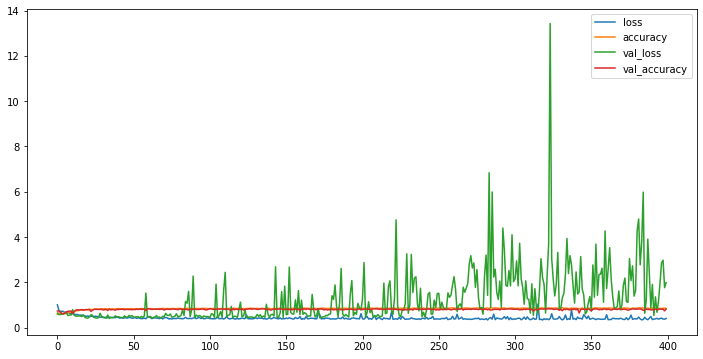

In [48]:
plotHistory(model_1_history)

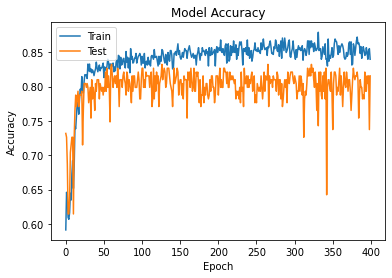

In [49]:
import matplotlib.pyplot as plt
plt.plot(model_1_history.history['accuracy'])
plt.plot(model_1_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig('Initial_Model_Accuracy.png')
plt.show()

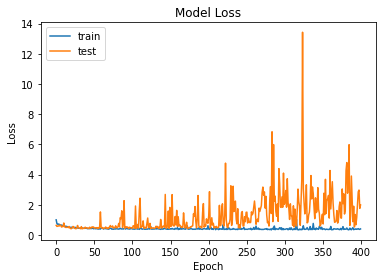

In [50]:
plt.plot(model_1_history.history['loss'])
plt.plot(model_1_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('Initial_Model_loss.png')
plt.show()

In [51]:
predictions = model_1.predict(X_test)
predictions = predictions.argmax(axis=1)
predictions = predictions.astype(int).flatten()
predictions = (lb.inverse_transform((predictions)))
predictions = pd.DataFrame({'Predicted Values': predictions})

In [52]:
actual=y_test.argmax(axis=1)
actual = actual.astype(int).flatten()
actual = (lb.inverse_transform((actual)))
actual = pd.DataFrame({'Actual Values': actual})

In [53]:
finaldf = actual.join(predictions)
finaldf[100:150]

,Actual Values,Predicted Values
100,0,0
101,0,0
102,0,0
103,0,0
104,0,1
105,1,0
106,1,1
107,0,0
108,0,0
109,1,1


In [54]:
predictions = model_1.predict(secondary)
predictions = predictions.argmax(axis=1)
predictions = predictions.astype(int).flatten()
predictions = (lb.inverse_transform((predictions)))
predictions = pd.DataFrame({'Predicted Values': predictions})

In [55]:
predictions.head()

,Predicted Values
0,0
1,0
2,0
3,0
4,0


In [56]:
secondary.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,...,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,...,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.0,418.000000
mean,2.265550,0.636364,29.805024,0.447368,0.392344,35.619000,0.050239,0.186603,0.574163,0.174641,...,0.645933,0.016746,0.043062,0.083732,0.031100,0.021531,0.019139,0.002392,0.0,0.782297
std,0.841838,0.481622,12.667969,0.896760,0.981429,55.840751,0.218700,0.390059,0.495062,0.380115,...,0.478803,0.128474,0.203240,0.277317,0.173797,0.145320,0.137177,0.048912,0.0,0.413179
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,1.000000,0.000000,23.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000
50%,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000
75%,3.000000,1.000000,35.750000,1.000000,0.000000,31.500000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000
max,3.000000,1.000000,76.000000,8.000000,9.000000,512.329200,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000


In [57]:
finalDf=pd.concat([secondary, predictions], axis=1)

In [58]:
finalDf.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,...,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Predicted Values
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [59]:
AnsDf=df2.join(predictions)
AnsDf.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Predicted Values
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0


In [60]:
AnsDf.to_csv("C:/Users/Zephyrus/Datasets/Titanic/Answers.csv")

In [61]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()

In [62]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [63]:
predictions = dtree.predict(X_test)

In [64]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score
print(classification_report(y_test,predictions))
accuracy=accuracy_score(y_true=y_test, y_pred=predictions)
print("Accuracy: {:.2f}%".format(accuracy*100))

              precision    recall  f1-score   support

           0       0.79      0.82      0.80       110
           1       0.70      0.65      0.68        69

   micro avg       0.76      0.75      0.76       179
   macro avg       0.75      0.74      0.74       179
weighted avg       0.76      0.75      0.75       179
 samples avg       0.75      0.75      0.75       179

Accuracy: 75.42%


C:\Users\Zephyrus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [65]:
from sklearn.ensemble import RandomForestClassifier

In [66]:
rforest = RandomForestClassifier(criterion="gini", max_depth=10, max_features="log2", 
                                 max_leaf_nodes = 100, min_samples_leaf = 3, min_samples_split = 20, 
                                 n_estimators= 22000, random_state= 5)

In [67]:
rforest.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features='log2', max_leaf_nodes=100,
                       min_samples_leaf=3, min_samples_split=20,
                       n_estimators=22000, random_state=5)

In [68]:
predictions = rforest.predict(X_test)

In [69]:
predictions[9]

array([0., 1.], dtype=float32)

In [70]:
print(classification_report(y_test,predictions))
accuracy=accuracy_score(y_true=y_test, y_pred=predictions)
print("Accuracy: {:.2f}%".format(accuracy*100))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87       110
           1       0.82      0.74      0.78        69

   micro avg       0.84      0.84      0.84       179
   macro avg       0.83      0.82      0.83       179
weighted avg       0.84      0.84      0.84       179
 samples avg       0.84      0.84      0.84       179

Accuracy: 83.80%


In [71]:
predictions2=rforest.predict(secondary).astype(int)

In [72]:
predictions2=pd.DataFrame({'Survived': predictions2})

ValueError: If using all scalar values, you must pass an index

In [73]:
predictions2.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [ ]:
df_temp = pd.DataFrame()
temp = pd.read_csv("C:/Users/Zephyrus/Datasets/Titanic/test.csv")
df_temp['PassengerId'] = aux['PassengerId']
df_temp['Survived'] = predictions2
df_temp[['PassengerId','Survived']].to_csv("C:/Users/Zephyrus/Datasets/Titanic/Answers4.csv", index=False)